<a href="https://colab.research.google.com/github/elenaajayi/Computer-Vision-Fundamentals---CUS-754/blob/main/ProblemSet_01/Problem_set_01_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
\

## Loading an image
The example code below, uses PIL library to load an image. Notice that the image is first download from the URL, then we use `Image.open` method to open the image. Finally, we use the `np.asarray` method from the numpy library to conver the image into an array. Try to load execute the code below and see the image.  Then try to download other images from the web and load them.

```python
# Import the libraries needed.
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

%matplotlib inline

# Spefiy the URL of the image.
url = "https://www.visitcyprus.com/media/k2/items/cache/c99e3db826c0f4cc2688a36ce3b60e1a_XL.jpg"

# Issue a get request to image source
res = requests.get(url)

# img is a PIL.JpegImagePlugin.JpegImageFile object, since the input image is jpg.
img = Image.open(BytesIO(res.content))

# Notice the shape of the array (797, 1175, 3), row, col, 3 colors
img_data = np.asarray(img)

print(img_data.shape)
img

```

(463, 703, 3)


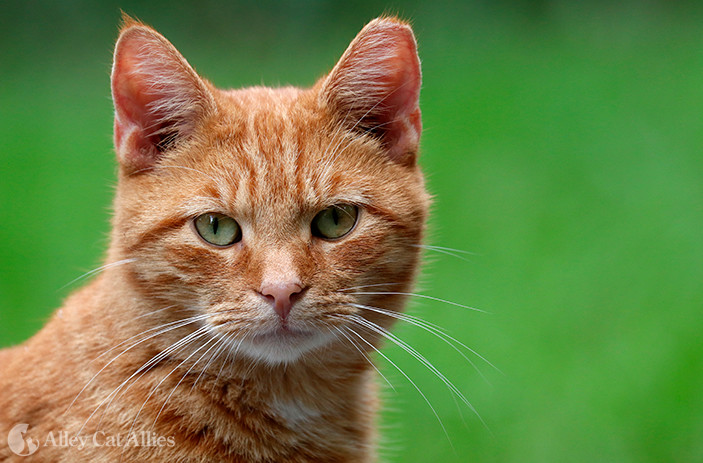

In [4]:
# Import the libraries needed.
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
import numpy as np

%matplotlib inline

# Spefiy the URL of the image.
url = "https://www.alleycat.org/wp-content/uploads/2019/03/FELV-cat.jpg"


# Issue a get request to image source
res = requests.get(url)

# img is a PIL.JpegImagePlugin.JpegImageFile object, since the input image is jpg.
img = Image.open(BytesIO(res.content))

# Notice the shape of the array (797, 1175, 3), row, col, 3 colors
img_data = np.asarray(img)

print(img_data.shape)
img

### Creating images from array values.

The Pillow library allows us to create an image from a 3D numpy array. The rows and columns specify pixels while the depth specify the color coding of the pixel in rgb. In the example below, we create a ellipse ellipse using the [analytical equation](https://en.wikipedia.org/wiki/Ellipse) for ellipse:
$$
\frac{x^2}{a^2} + \frac{y^2}{b^2} = 1
$$

Here is a simple example creating an image from raw values.

```python
from PIL import Image  
import numpy as np  

# specify a 3D array of values - notice the values of the array as uint8 (i.e. bytes)
w, h = 128, 128
# Create a new array of dimensions h by w.

data = np.zeros((h,w,3), dtype=np.uint8)

a , b =  w/2, h/2

cw,ch = w/2, h/2  # Center of the image.

for x in range(128):
  for y in range(128):
    ellipse_radis = ((x-cw)*(x-cw)/(a*a) + (y-ch)*(y-ch)/(b*b))
    if ellipse_radis < 0.8:
      data[x,y] = [0,0, max(128,ellipse_radis*255)] # setting blue color proportional to the distance.

# Convert array back to image
img = Image.fromarray(data)
img

```
**Tasks Todo**
* Try to reproduce the code above, in the cell provided below.
* Try to change the values of $a$ and $b$ and see how the shape changes (i.e. try $a=w/4$).
* Change the code so it displayes a solid red ellipse.
* Modify the code, to create a circle of half the radius of what is given in the example. (Use separate cell for each task)




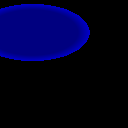

In [3]:
from PIL import Image
import numpy as np

#changing a and b values

# specify a 3D array of values - notice the values of the array as uint8 (i.e. bytes)
w, h = 128, 128
# Create a new array of dimensions h by w.

data = np.zeros((h,w,3), dtype=np.uint8)

a , b =  w/4, w/2  #change a, keep b

cw,ch = w/4, h/4 # Center of the image.

for x in range(128):
  for y in range(128):
    ellipse_radis = ((x-cw)*(x-cw)/(a*a) + (y-ch)*(y-ch)/(b*b))
    if ellipse_radis < 0.8:
      data[x,y] = [0,0, max(128,ellipse_radis*255)] # setting blue color proportional to the distance.

# Convert array back to image
img = Image.fromarray(data)
img


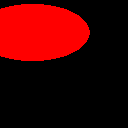

In [4]:
from PIL import Image
import numpy as np

#solid red eclipse

# specify a 3D array of values - notice the values of the array as uint8 (i.e. bytes)
w, h = 128, 128
# Create a new array of dimensions h by w.

data = np.zeros((h,w,3), dtype=np.uint8)

a , b =  w/4, h/2

cw,ch = w/4, h/4 # Center of the image.

for x in range(128):
  for y in range(128):
    ellipse_radis = ((x-cw)*(x-cw)/(a*a) + (y-ch)*(y-ch)/(b*b))
    if ellipse_radis < 0.8:
      data[x,y] = [255, 0, 0] # setting solid red

# Convert array back to image
img = Image.fromarray(data)
img

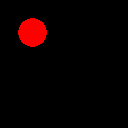

In [5]:
#circle with 1/2 radius
from PIL import Image
import numpy as np

#solid red eclipse

# specify a 3D array of values - notice the values of the array as uint8 (i.e. bytes)
w, h = 128, 128
# Create a new array of dimensions h by w.

data = np.zeros((h,w,3), dtype=np.uint8)

a , b =  (w/4) / 2, (h/4) / 2  #halving original ellipse radious properly

cw,ch = w/4, h/4 # Center of the image.

for x in range(128):
  for y in range(128):
    ellipse_radis = ((x-cw)*(x-cw)/(a*a) + (y-ch)*(y-ch)/(b*b))
    if ellipse_radis < 0.8:
      data[x,y] = [255, 0, 0] # setting solid red

# Convert array back to image
img = Image.fromarray(data)
img


## Transforming images.

Once we have an image loaded in memory, we can programmatically manipulate it's pixel values to transform the image. This pixel level transformation allow us to modify the image. For example, we can convert an image to gray-scale, enhance some colors of the image, or filter the image. The code below illustrates how to convert an image to grayscale by manipulating its pixel values.

```python
from PIL import Image
import numpy as np
import requests
from io import BytesIO

 # Spefiy the URL of the image.
url = "https://www.libertyellisfoundation.org/statueoflibertymuseum/images/SOLM_Index_Main_photo.jpg"
url = "https://www.visitcyprus.com/media/k2/items/cache/c99e3db826c0f4cc2688a36ce3b60e1a_XL.jpg"

res = requests.get(url)
img = Image.open(BytesIO(res.content))

# Get the data as as array
img_data = np.asarray(img)

[rows, cols, depth] = img_data.shape

# Create an empty image with the same dimension
grayscale_img_data = np.zeros((rows,cols,depth),dtype=np.uint8)

# Assigne to each color channel the
grayscale_img_data[:,:,0] = np.mean(img_data,axis=2) * 1
grayscale_img_data[:,:,1] = np.mean(img_data,axis=2) * 1
grayscale_img_data[:,:,2] = np.mean(img_data,axis=2) * 1

# Convert the array data to an image
grayscale_img = Image.fromarray(grayscale_img_data)

grayscale_img
```
*Tasks Todo*
* Try to reproduce the code above, in the cell provided below.
* Try using different weights for each color channel (i.e. multiply each color channel with values less than one) and see how the image changes.
* Try to weight some channels with values greater than one and see how the image changes.
* Apply the threshold transformation on each color channel separetely and display the resulting image. The threshold rule to apply is as follows:
  * if (pixel > threshold) set the pixel to the value 255; otherise set it to zero. Try different threshold values.


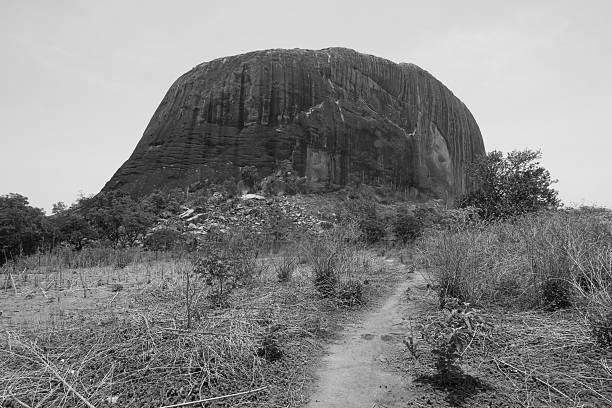

In [20]:
# from PIL import Image
import numpy as np
import requests
from io import BytesIO

 # Spefiy the URL of the image.
url = "https://media.istockphoto.com/id/172206427/photo/the-way-to-zuma-rock.jpg?s=612x612&w=0&k=20&c=BdG0s1GA4PCpsAF5DsYNWw_GZiJ1g2ZWxswnJabkhTM="

res = requests.get(url)
img = Image.open(BytesIO(res.content))

# Get the data as as array
img_data = np.asarray(img)

[rows, cols, depth] = img_data.shape

# Create an empty image with the same dimension
grayscale_img_data = np.zeros((rows,cols,depth),dtype=np.uint8)

# Assigne to each color channel the
grayscale_img_data[:,:,0] = np.mean(img_data,axis=2) * 1
grayscale_img_data[:,:,1] = np.mean(img_data,axis=2) * 1
grayscale_img_data[:,:,2] = np.mean(img_data,axis=2) * 1

# Convert the array data to an image
grayscale_img = Image.fromarray(grayscale_img_data)

grayscale_img

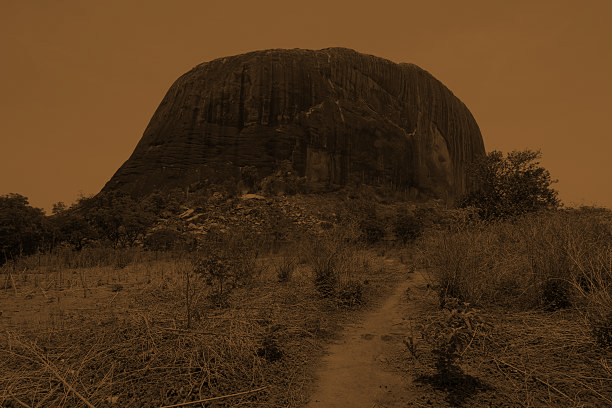

In [9]:
#diff weights
from PIL import Image

weight_img_data = np.zeros((rows,cols,depth),dtype=np.uint8)

weight_img_data[:,:,0] = (grayscale_img_data[:,:,0] * 0.6).astype(np.uint8)  # Red channel reduced
weight_img_data[:,:,1] = (grayscale_img_data[:,:,1] * 0.4).astype(np.uint8)  # Green channel reduced
weight_img_data[:,:,2] = (grayscale_img_data[:,:,2] * 0.2).astype(np.uint8)  # Blue channel reduced


weight_img = Image.fromarray(weight_img_data)

weight_img

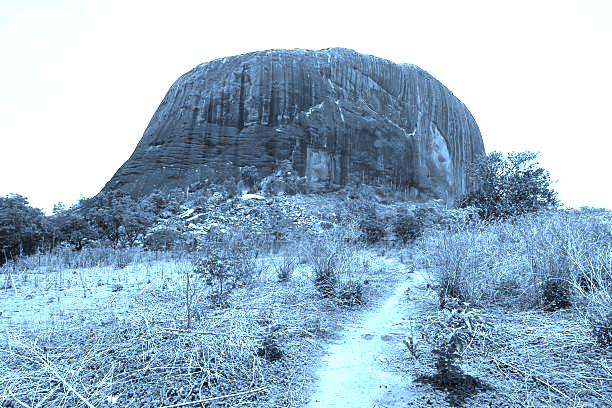

In [12]:
#apply weights
from PIL import Image

bright_img_data = np.zeros((rows,cols,depth),dtype=np.uint8)

bright_img_data[:,:,0] = np.clip(grayscale_img_data[:,:,0] * 1.2, 0, 255).astype(np.uint8) #applying diff weights to increase brightness
bright_img_data[:,:,1] = np.clip(grayscale_img_data[:,:,1] * 1.6, 0, 255).astype(np.uint8) #applying diff weights to increase brightness
bright_img_data[:,:,2] = np.clip(grayscale_img_data[:,:,2] * 2.0, 0, 255).astype(np.uint8) #applying diff weights to increase brightness

bright_img = Image.fromarray(bright_img_data)

bright_img

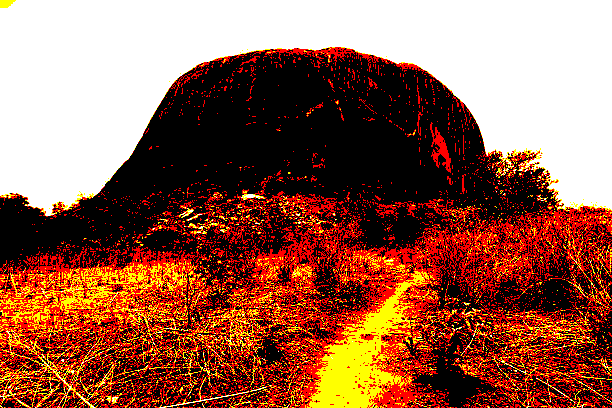

In [14]:
#apply threshld transformation to each color separately

from PIL import Image


threshold_img_data = np.zeros((rows,cols,depth),dtype=np.uint8)

#defining threhsold values
threshold_red = 100
threshold_green = 150
threshold_blue = 200

#apply threshold transform
threshold_img_data[:,:,0] = np.where(grayscale_img_data[:,:,0] > threshold_red, 255, 0)
threshold_img_data[:,:,1] = np.where(grayscale_img_data[:,:,1] > threshold_green, 255, 0)
threshold_img_data[:,:,2] = np.where(grayscale_img_data[:,:,2] > threshold_blue, 255, 0)

#turn array back to image
threshold_img = Image.fromarray(threshold_img_data)

threshold_img


## Crop and resize images.

A common transformation we need to apply to image is that of croping and resizeing the image. The code below demonstrates how to achieve this.

```python
url = "https://www.visitcyprus.com/media/k2/items/cache/c99e3db826c0f4cc2688a36ce3b60e1a_XL.jpg"

resize_pixels = 128

res = requests.get(url)
img = Image.open(BytesIO(res.content))

# Convert image into a square image.
cols, rows = img.size
extra = (rows-cols)/2

if (extra>0):  
  # more rows than columns, crop rows
  crop_box = (0,extra,cols,cols+extra)
else:
  # more cols than rows, crop cols
  crop_box = (-extra,0,rows-extra,rows)

# Crop image into a square and resize image based on resize_
standarized_image = img.crop(crop_box).resize((resize_pixels,resize_pixels), Image.ANTIALIAS)

standarized_image

```
**Tasks ToDo**
* Try to reproduce the code above, in the cell provided below.
* Load your one image and apply the crop and resize operations.




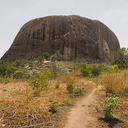

In [16]:
# Try the code above.

url = "https://media.istockphoto.com/id/172206427/photo/the-way-to-zuma-rock.jpg?s=612x612&w=0&k=20&c=BdG0s1GA4PCpsAF5DsYNWw_GZiJ1g2ZWxswnJabkhTM="

resize_pixels = 128

res = requests.get(url)
img = Image.open(BytesIO(res.content))

# Convert image into a square image.
cols, rows = img.size
extra = (rows-cols)/2

if (extra>0):
  # more rows than columns, crop rows
  crop_box = (0,extra,cols,cols+extra)
else:
  # more cols than rows, crop cols
  crop_box = (-extra,0,rows-extra,rows)

# Crop image into a square and resize image based on resize_
standarized_image = img.crop(crop_box).resize((resize_pixels,resize_pixels), Image.Resampling.LANCZOS) #ANTIALIAS is unavailable, its called Resampling.LANCZOS

standarized_image


## Adding Noise to the image.
Often times we might want to add noise to an image for the purpose to introducing variability in our training dataset and to benchmark the performance of our algorithms. There are several way to introduce noise in the image.

One type of noise is the `salt and pepper noise`. That is with some probability alpha we transform a pixel value to either 0 or 255; and with probability (1-alpha) we leave the pixel unchanged. This introduces black and white pixels in the image that show as noise.

**Task Todo**
- Write a function that taks as an input an image and a noise level (i.e. alpha) and generates a noise version of the input image, using the `salt and pepper` noise.
- Call you method to showcase that it works.


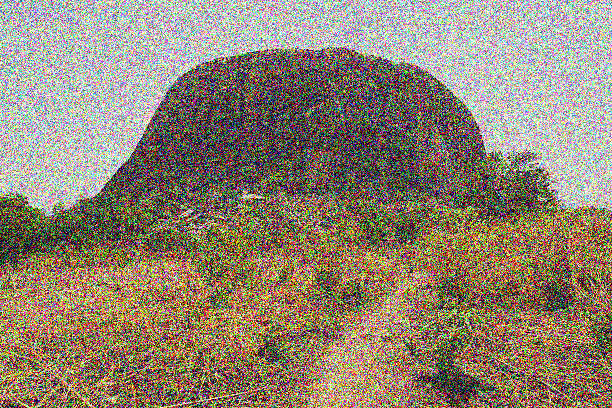

In [18]:
# Implement the task in this cell.

from PIL import Image
import numpy as np
import requests
from io import BytesIO

url = "https://media.istockphoto.com/id/172206427/photo/the-way-to-zuma-rock.jpg?s=612x612&w=0&k=20&c=BdG0s1GA4PCpsAF5DsYNWw_GZiJ1g2ZWxswnJabkhTM="

res = requests.get(url)
img = Image.open(BytesIO(res.content))

# Get the data as as array
img_data = np.asarray(img)

[rows, cols, depth] = img_data.shape

# Create an copy of image data
noisy_img_data = img_data.copy()

#create rand noise
noise = np.random.randint(-150, 150, (rows, cols, depth), dtype=np.int16)

#add noise to img while keeping pixel values valid range [0, 255]
noisy_img_data = np.clip(img_data + noise, 0, 255).astype(np.uint8)

# Convert the array data to an image
noisy_img = Image.fromarray(noisy_img_data)

noisy_img



## Puting it all together
Try to use the methods we cover above to peform the following tasks

* Load three image of separate size.
* Resize both images so they have same width and height.
* Create a composite image that includes the red channel of the first image, the green channel of the second image, and the blue channel of the third image.
* Add a circle overlay in the image; generate the circle programmatically.
* Display the resulting image.
* Create three noisy level of the image using `salt and pepper` noise. Use level noise of 6%, 12%, 24% and 50%. Display the images.




In [26]:
#load 3 diff images
from PIL import Image
import numpy as np
import requests
from io import BytesIO

#load 3 diff images from urls
url1 = "https://skift.com/wp-content/uploads/2022/06/GettyImages-1208049833-scaled-e1654782377122.jpg"
url2 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT58rtcp8woNKLato0ehVn0YVCM3KRk3LZ_Gg&s"
url3 = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFxTZYN7mJCuQnJGQYyMuLUv7xcn1poW2bAA&s"


resize_pixels = 256

#download & open images

res1 = requests.get(url1)
res2 = requests.get(url2)
res3 = requests.get(url3)

img1 = Image.open(BytesIO(res1.content))
img2 = Image.open(BytesIO(res2.content))
img3 = Image.open(BytesIO(res3.content))

#reside images
img1 = img1.resize((resize_pixels, resize_pixels), Image.Resampling.LANCZOS)
img2 = img2.resize((resize_pixels, resize_pixels), Image.Resampling.LANCZOS)
img3 = img3.resize((resize_pixels, resize_pixels), Image.Resampling.LANCZOS)

#convert imgs to numpy arrays

img_data1 = np.asarray(img1)
img_data2 = np.asarray(img2)
img_data3 = np.asarray(img3)

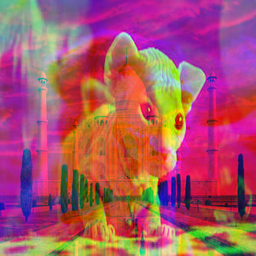

In [28]:
#create empty array

composite_img_data = np.zeros((resize_pixels, resize_pixels, 3), dtype=np.uint8)

# assigning channels: R from img1, G from img2, B fromm img3
composite_img_data[:, :, 0] = img_data1[:, :, 0]  # Red channel from first image
composite_img_data[:, :, 1] = img_data2[:, :, 1]  # Green channel from second image
composite_img_data[:, :, 2] = img_data3[:, :, 2]  # Blue channel from third image

# turn array back to image
composite_img = Image.fromarray(composite_img_data)

composite_img


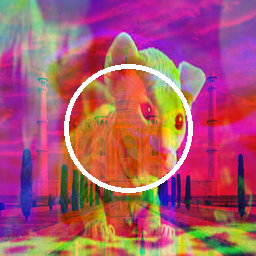

In [30]:
#add circle overlay

from PIL import ImageDraw

# create a drawable version
overlay_img = composite_img.copy()
draw = ImageDraw.Draw(overlay_img)

# define property of circle
circle_center = (resize_pixels // 2, resize_pixels // 2)  # Center of the image
circle_radius = resize_pixels // 4  # One-fourth of image size

# draw circle
draw.ellipse(
    [(circle_center[0] - circle_radius, circle_center[1] - circle_radius),
     (circle_center[0] + circle_radius, circle_center[1] + circle_radius)],
    outline=(255, 255, 255), width=5
)

overlay_img

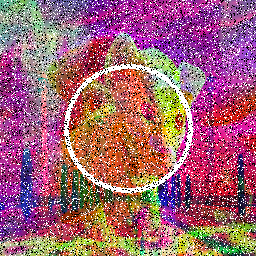

In [36]:
import random


# function to add salt & pepper noise
def add_salt_and_pepper_noise(image_data, noise_level):
    # Convert image to numpy array
    noisy_image_data = image_data.copy()
    num_pixels = int(noise_level * image_data.size / 100)

    for _ in range(num_pixels):
        x = random.randint(0, resize_pixels - 1)
        y = random.randint(0, resize_pixels - 1)
        color = random.choice([0, 255])
        noisy_image_data[y, x] = [color, color, color]  # noise to all channels

    return noisy_image_data

# generate images w diff noise levels
noise_levels = [9, 18, 27, 36]
noisy_images = []  # list to store noisy images

for level in noise_levels:
    noisy_data = add_salt_and_pepper_noise(np.array(overlay_img), level)
    noisy_images.append(Image.fromarray(noisy_data))

# display first noisy image as output
noisy_images[0]
